# 1 - Importing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First we import the training dataset:

In [2]:
train_dataset = pd.read_csv("titanic/train.csv")

Let's visualize the first rows of the dataset

In [3]:
train_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_dataset.shape

(891, 12)

There are 891 rows and each of them correspond to one passenger and there are 12 columns.

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


There are 7 numerical variables and 5 categorical variables. The `Age` and `Cabin` variables have some missing data, we must fix it later.

**Qualitative variables**

`Name` variable

In [6]:
train_dataset["Name"].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

We can see that there are 891 groups, therefore each row correspond to a single passenger.

`Sex` variable

In [7]:
train_dataset["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

We have men and women, in the train dataset there are more men than women.

`Ticket` variable

In [8]:
train_dataset["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

We can see that there are less tickets than passengers.

`Cabin` variable

In [9]:
train_dataset["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

There are 204 referenced cabins and among them there are 147 groups.

`Embarked` variable

In [10]:
train_dataset["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

There are three groups, "S" is for Southampton, "Q" is for Queenstown and "C" is for Cherbourg.

**Quantitative variables**

In [11]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

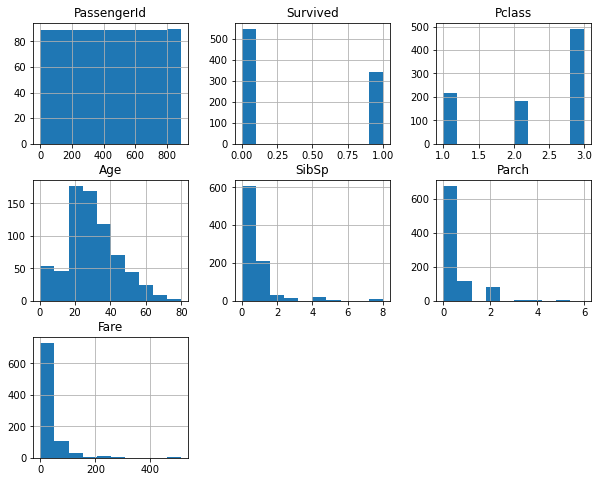

In [12]:
train_dataset.select_dtypes(include="number").hist(figsize=(10,8))

# 2 - Data visualization

**Correlations**

In [13]:
corr = train_dataset.corr()

<AxesSubplot:>

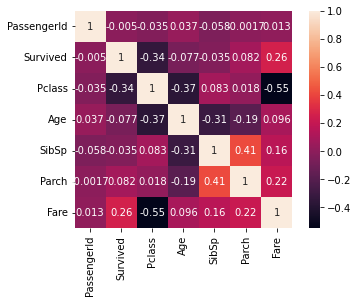

In [14]:
sns.heatmap(corr, annot=True, square=True)

In [15]:
corr["Survived"].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

`Survived` and `Pclass` have a correlation rate of -0.34. It means that there is a small negative linear relationship between these two variables. 

`Survived` and `Fare` have a correlation rate of 0.25. It means that there is a small positive linear relationship between these two variables.

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Parch', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Parch'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Parch'>,
        <AxesSubplot:xlabel='Fare', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', ylabel='Parch'>]], dtype=object)

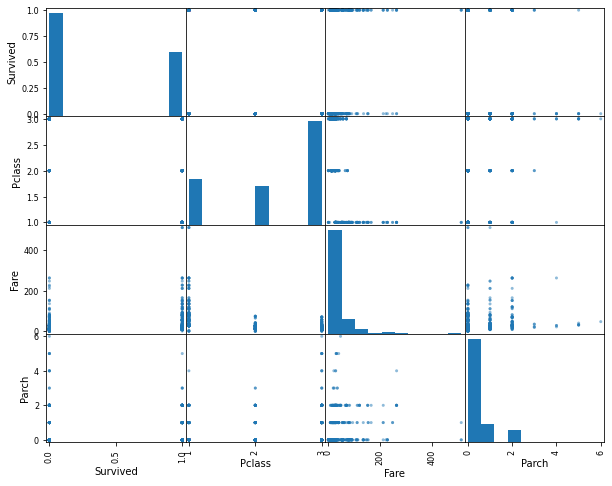

In [16]:
from pandas.plotting import scatter_matrix
variables = ["Survived", "Pclass", "Fare", "Parch"]

scatter_matrix(train_dataset[variables], figsize=(10,8))

# 3 -  Data preparation

In [17]:
train_dataset_labels=train_dataset["Survived"].copy()
train_dataset.drop(labels="Survived", axis=1, inplace=True)

## Step 1: Missing data

We will implement two `SimpleImputer()`: one for the qualitative variables and one for the qualitative variables. We will replace the missing data in the qualitative variables with "Unknown" and we will replace the numerical missing data with the median of their variable.

In [18]:
from sklearn.impute import SimpleImputer

## Step 2: Qualitative variables:

We will implement an `OneHotEncoder()`

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

cat_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy="constant", fill_value="Unknown")),
     ("ordinal_encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
     ('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
      ])

## Step 3: Final preparation:

In [76]:
from sklearn.compose import ColumnTransformer

num_attribs = train_dataset.select_dtypes(include="number").columns.tolist()
cat_attribs = train_dataset.select_dtypes(include="object").columns.tolist()

full_pipeline = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [77]:
train_prepared = full_pipeline.fit_transform(train_dataset)

# 4 - Select and fit a model:

**SGDClassifier**

In [22]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_prepared, train_dataset_labels)

SGDClassifier(random_state=42)

In [23]:
sgd_clf.predict(train_prepared[0])

array([0], dtype=int64)

In [47]:
from sklearn.model_selection import cross_val_predict
train_predict = cross_val_predict(sgd_clf, train_prepared, train_dataset_labels, cv=10)

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_dataset_labels, train_predict)

array([[272, 277],
       [158, 184]], dtype=int64)

**DecisionTreeClassifier**

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(train_prepared, train_dataset_labels)

DecisionTreeClassifier(max_depth=2)

In [45]:
train_predict = cross_val_predict(tree_clf, train_prepared, train_dataset_labels, cv=10)

In [46]:
confusion_matrix(train_dataset_labels, train_predict)

array([[490,  59],
       [147, 195]], dtype=int64)

**RandomForestClassifier**

In [78]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
rnd_clf.fit(train_prepared, train_dataset_labels)

RandomForestClassifier()

In [79]:
train_predict = cross_val_predict(rnd_clf, train_prepared, train_dataset_labels, cv=10)

In [80]:
confusion_matrix(train_dataset_labels, train_predict)

array([[507,  42],
       [110, 232]], dtype=int64)

**Support Vector Machines**

In [38]:
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto")
svm_clf.fit(train_prepared, train_dataset_labels)

SVC(gamma='auto')

In [41]:
train_predict = cross_val_predict(svm_clf, train_prepared, train_dataset_labels, cv=10)

In [49]:
confusion_matrix(train_dataset_labels, train_predict)

array([[272, 277],
       [158, 184]], dtype=int64)

# 5 - Test dataset

In [81]:
test_dataset = pd.read_csv("titanic/test.csv")

In [83]:
test_prepared = full_pipeline.transform(test_dataset)
test_predict = rnd_clf.predict(test_prepared)

In [84]:
test_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,